Import Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [9]:
parent_dir = '../../data/fjthrput/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [10]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(8, 5)


,Iterations,N,A,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,10000,50,147.335941,34.949875
1,10,10000,100,323.351335,59.518312
2,10,10000,500,1750.183608,192.085848
3,10,10000,1000,3693.836215,437.586627
4,10,10000,5000,18496.979695,2719.586663
5,10,10000,10000,39770.955600,5913.914845
6,10,10000,50000,190567.248458,35361.011463
7,10,10000,100000,373426.639604,72667.883041


Add Custom Column for N and R

In [11]:
def format_number_str(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

In [12]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['A_N'] = "(A=" + df['A'].apply(format_number_str) + ", N=" + df['N'].apply(format_number_str) + ")"
df.head(15)

,Iterations,N,A,Erlang Energy Consumption(J),Scala Energy Consumption(J),A_N
0,10,10000,50,147.335941,34.949875,"(A=50, N=10K)"
1,10,10000,100,323.351335,59.518312,"(A=100, N=10K)"
2,10,10000,500,1750.183608,192.085848,"(A=500, N=10K)"
3,10,10000,1000,3693.836215,437.586627,"(A=1K, N=10K)"
4,10,10000,5000,18496.979695,2719.586663,"(A=5K, N=10K)"
5,10,10000,10000,39770.955600,5913.914845,"(A=10K, N=10K)"
6,10,10000,50000,190567.248458,35361.011463,"(A=50K, N=10K)"
7,10,10000,100000,373426.639604,72667.883041,"(A=100K, N=10K)"


Visualize the Data

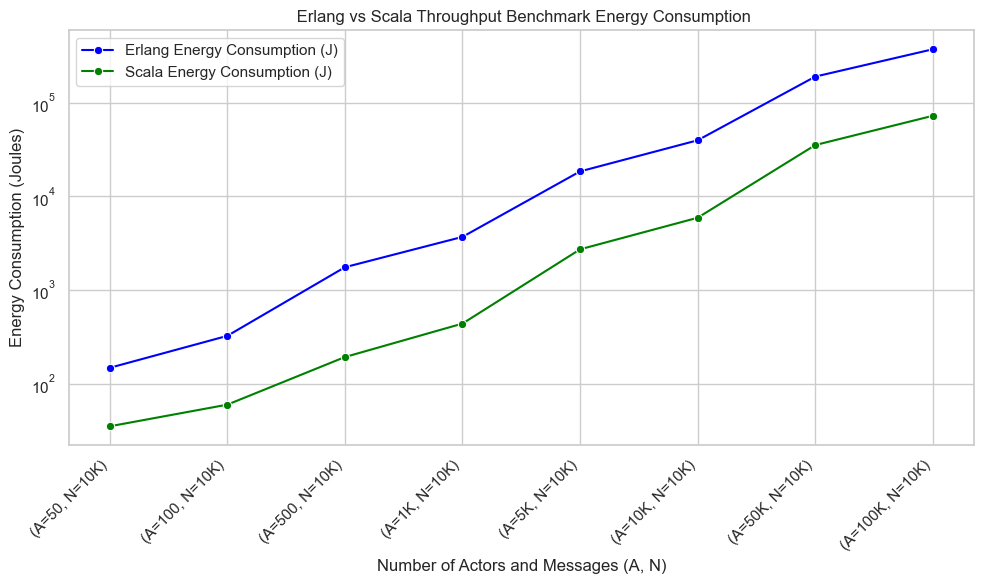

In [13]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="A_N", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="A_N", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Actors and Messages (A, N)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Throughput Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
